In [ ]:
!pip install pertpy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.0/627.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.9/291.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.6/183.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.6/560.6 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.2/824.2 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 4.3 MB/s eta 0:00

In [ ]:
# --- Standard-library utilities ------------------------------------------------
import os                 # file-system operations (e.g. os.environ or os.path)
import sys                # Python runtime details; we use it for version checks
import time               # simple timing / benchmarking of cells
from pathlib import Path  # convenient, cross-platform path handling
from collections import OrderedDict  # deterministic dicts for reproducible logs
import random             # Python RNG (seeded below for reproducibility)
import warnings           # warning control (e.g. to suppress scVI warnings)
import gdown              # enable google drive downloads
warnings.filterwarnings('ignore')  # suppress warnings (e.g. from scVI or scanpy)

# --- Numerical & data-handling stack -------------------------------------------
import numpy as np        # dense numerical arrays
import pandas as pd       # tabular data frames
from pandas.api.types import CategoricalDtype  # categorical data types
from scipy import sparse  # sparse matrix utilities
from scipy import stats   # statistical functions (e.g. t-tests, correlations)
from scipy.spatial.distance import cosine as cosine_dist, cdist  # distance metrics
from scipy.sparse import issparse  # check if a matrix is sparse

# --- Single-cell analysis ecosystem --------------------------------------------
import scanpy as sc       # core single-cell workflow (AnnData, QC, plotting)
from scanpy.pl import DotPlot # dot plots for visualising gene expression
import anndata            # core data structure for single-cell data (AnnData)
import pertpy as pt       # Perturb-Bench helpers: dataset loaders & metrics
import scvi               # single-cell variational inference (scVI) for deep learning
from scvi import REGISTRY_KEYS  # keys used by scvi-tools / scGen for AnnData metadata

# --- Deep-learning backend -----------------------------------------------------
import torch                    # PyTorch (Tensor operations)
import pytorch_lightning as pl  # PyTorch Lightning (high-level training framework)

# --- Machine-learning utilities ------------------------------------------------
from sklearn.decomposition import PCA                # dimensionality reduction
from sklearn.neighbors import KernelDensity          # density estimation
from sklearn.metrics import r2_score                 # R-squared metric
from sklearn.metrics import pairwise_distances       # pairwise distance metrics

# --- Plotting & visualisation --------------------------------------------------
import matplotlib.pyplot as plt  # base plotting library
import matplotlib as mpl         # base matplotlib library
import seaborn as sns            # higher-level statistical plots

# --- Device & runtime configuration --------------------------------------------
device = torch.device("cuda")
print(f"Running on'GPU'")

# --- Global reproducibility ----------------------------------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True   # exact determinism (may reduce speed)
torch.backends.cudnn.benchmark = False
pl.seed_everything(SEED, workers=True)
scvi.settings.seed = SEED

print(f"Random seed set to {SEED}")

INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


Running on'GPU'
Random seed set to 42


In [ ]:
adata = sc.read("/content/CRISPRa_hvg_filter.h5ad")
adata

AnnData object with n_obs × n_vars = 13279 × 2124
    obs: 'batch', 'gene', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'mixscape_class_p_ko', 'mixscape_class', 'mixscape_class_global', 'pertclass'
    var: 'ENSEMBL', 'ENTREZID', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'mixscape', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'X_pert', 'normal_counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata.obs

batch     gene  n_genes  n_genes_by_counts  total_counts  \
ATTCTTGTCAGTCTTT     1    CLRN2     5648               5648       20691.0   
GGTTCTCAGGAATTAC     1     NOS3     3596               3596       10340.0   
ACAAAGAGTGGAACCA     1  CCDC85C     3845               3845       11160.0   
GCGGAAATCGTAGCTA     1    MEGF6     3894               3893        9906.0   
GGATGTTAGCTCATAC     1  CCDC85C     2167               2167        4658.0   
...                ...      ...      ...                ...           ...   
AGAACCTCACATAGCT     2  PPP2R2B     3938               3938       12318.0   
TCCTAATGTTCTTAGG     2    RRAS2     3223               3223        8707.0   
TTCTCTCGTGACTGAG     2     GDI1     2725               2725        6711.0   
CGGGACTTCTATACTC     1   ATP5C1     3856               3856       10906.0   
CCAAGCGCATCACGGC     2    IGF1R     4535               4535       13209.0   

                  total_counts_mt  pct_counts_mt leiden  mixscape_class_p_ko  \
ATTCTTGTCAGTCTTT           1330.0       6.427916      1             0.000000   
GGTTCTCAGGAATTAC            706.0       6.827853      4             0.856865   
ACAAAGAGTGGAACCA            823.0       7.374552      0             0.000000   
GCGGAAATCGTAGCTA            476.0       4.805169      3             0.000000   
GGATGTTAGCTCATAC            442.0       9.489051      2             0.000000   
...                           ...            ...    ...                  ...   
AGAACCTCACATAGCT            746.0       6.056178      0             0.000000   
TCCTAATGTTCTTAGG            439.0       5.041920      3             0.000000   
TTCTCTCGTGACTGAG            383.0       5.707048      3             0.000000   
CGGGACTTCTATACTC           1062.0       9.737759      1             0.994253   
CCAAGCGCATCACGGC            658.0       4.981452      6             0.073226   

                 mixscape_class mixscape_class_global pertclass  
ATTCTTGTCAGTCTTT       CLRN2 NP                    NP      weak  
GGTTCTCAGGAATTAC        NOS3 KO                    KO    strong  
ACAAAGAGTGGAACCA     CCDC85C NP                    NP      weak  
GCGGAAATCGTAGCTA       MEGF6 NP                    NP      weak  
GGATGTTAGCTCATAC     CCDC85C NP                    NP      weak  
...                         ...                   ...       ...  
AGAACCTCACATAGCT     PPP2R2B NP                    NP      weak  
TCCTAATGTTCTTAGG       RRAS2 NP                    NP      weak  
TTCTCTCGTGACTGAG        GDI1 NP                    NP      weak  
CGGGACTTCTATACTC      ATP5C1 KO                    KO    strong  
CCAAGCGCATCACGGC       IGF1R NP                    NP      weak  

[13279 rows x 12 columns]

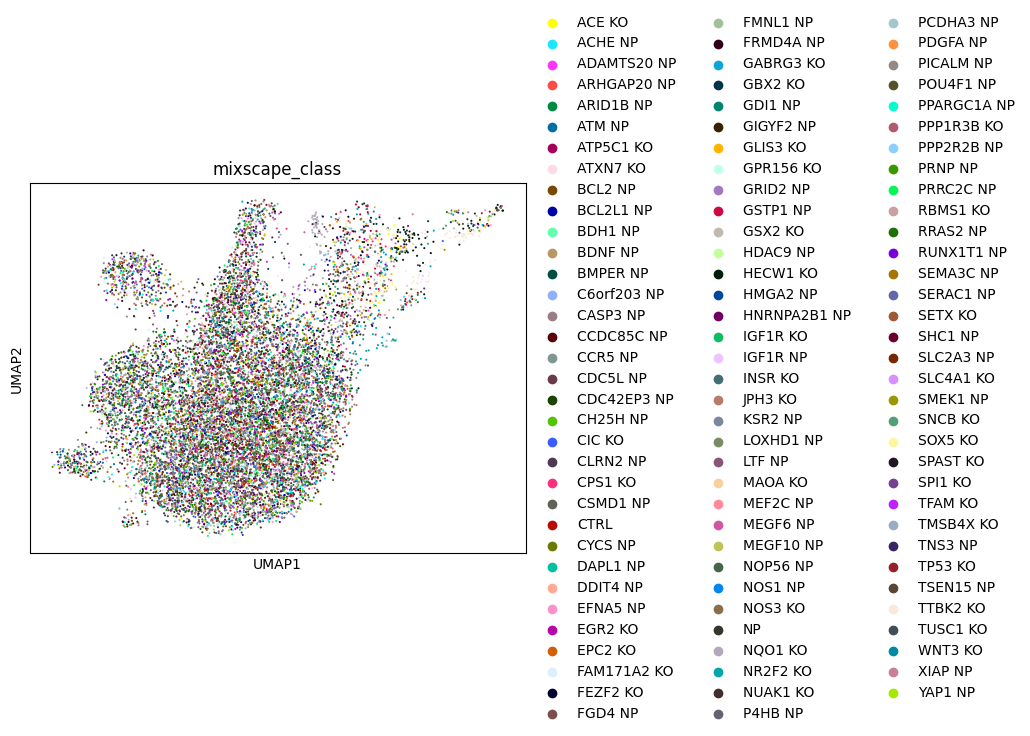

In [ ]:
sc.pl.umap(adata, color = 'mixscape_class')
fig = plt.gcf()
display(fig)

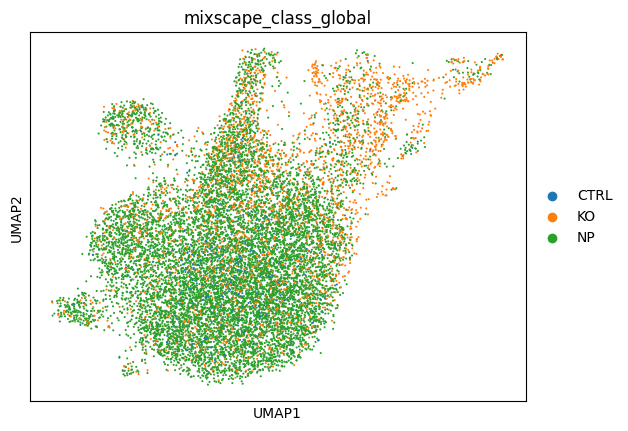

In [ ]:
sc.pl.umap(adata, color=["mixscape_class_global"])
fig = plt.gcf()
display(fig)

In [ ]:
# Unique values in the column
print(adata.obs["mixscape_class"].unique().tolist())

['CLRN2 NP', 'NOS3 KO', 'CCDC85C NP', 'MEGF6 NP', 'FMNL1 NP', 'CASP3 NP', 'C6orf203 NP', 'TUSC1 KO', 'PCDHA3 NP', 'JPH3 KO', 'CSMD1 NP', 'GBX2 KO', 'PRRC2C NP', 'SERAC1 NP', 'PPARGC1A NP', 'WNT3 KO', 'GSX2 KO', 'PICALM NP', 'MEF2C NP', 'EFNA5 NP', 'LTF NP', 'YAP1 NP', 'BDNF NP', 'CTRL', 'CYCS NP', 'TTBK2 KO', 'EGR2 KO', 'GIGYF2 NP', 'SPAST KO', 'HMGA2 NP', 'TP53 KO', 'INSR KO', 'BCL2L1 NP', 'EPC2 KO', 'XIAP NP', 'ACHE NP', 'SHC1 NP', 'IGF1R NP', 'NOP56 NP', 'CDC42EP3 NP', 'CDC5L NP', 'FEZF2 KO', 'CIC KO', 'PPP2R2B NP', 'ARHGAP20 NP', 'CH25H NP', 'ARID1B NP', 'KSR2 NP', 'TNS3 NP', 'SLC2A3 NP', 'SNCB KO', 'BMPER NP', 'FGD4 NP', 'FRMD4A NP', 'GDI1 NP', 'HDAC9 NP', 'GPR156 KO', 'PPP1R3B KO', 'SOX5 KO', 'NR2F2 KO', 'RRAS2 NP', 'LOXHD1 NP', 'NP', 'P4HB NP', 'ADAMTS20 NP', 'GRID2 NP', 'MAOA KO', 'ATM NP', 'HNRNPA2B1 NP', 'GSTP1 NP', 'TSEN15 NP', 'DAPL1 NP', 'POU4F1 NP', 'SMEK1 NP', 'PRNP NP', 'DDIT4 NP', 'FAM171A2 KO', 'NQO1 KO', 'ATP5C1 KO', 'NUAK1 KO', 'HECW1 KO', 'RUNX1T1 NP', 'CCR5 NP', '

In [ ]:
# 1. Rename column 'gene' to 'perturbation'
adata.obs.rename(columns={"gene": "perturbation"}, inplace=True)

# 2. Replace 'CTRL' with 'control' in the new 'perturbation' column
adata.obs["perturbation"] = adata.obs["perturbation"].replace("CTRL", "control")

In [ ]:
print(adata.X)

[[-0.2050626  -0.14926726 -0.07981856 ...  0.         -0.3343537
  -0.19844842]
 [ 0.7561897   0.8063305  -0.0316062  ... -0.07784344 -0.09842518
  -0.6349856 ]
 [ 0.65299594  0.41445854 -0.12179001 ... -0.10271318 -0.16758622
  -0.6977768 ]
 ...
 [-0.58274096 -0.873948   -0.14472769 ... -0.05679715 -0.04863847
  -0.47164106]
 [-0.43882307 -0.78276944 -0.07457889 ...  0.          0.50484353
   0.7902366 ]
 [-0.5840136   0.29818922  0.48839885 ... -0.03900346 -0.25550148
   0.00425279]]


In [ ]:
perturbation_counts = adata.obs['perturbation'].value_counts().reset_index()
perturbation_counts.columns = ['perturbation', 'cell_count']

In [ ]:
perturbation_counts.head(60)

perturbation  cell_count
0         NOP56         350
1       control         332
2         RRAS2         317
3        ARID1B         258
4      CDC42EP3         256
5       RUNX1T1         255
6         CASP3         235
7        BCL2L1         230
8         CH25H         225
9          PRNP         220
10        HMGA2         216
11        HDAC9         216
12         P4HB         216
13       TSEN15         212
14        TTBK2         212
15        IGF1R         206
16       PCDHA3         199
17       PRRC2C         196
18         YAP1         195
19         KSR2         190
20         SHC1         186
21        MEGF6         182
22    HNRNPA2B1         175
23       FRMD4A         173
24        EFNA5         172
25         INSR         169
26      PPP2R2B         169
27      CCDC85C         168
28         JPH3         165
29        GRID2         165
30         XIAP         163
31         CCR5         162
32       SERAC1         159
33        BMPER         154
34         BCL2         152
35         FGD4         147
36         ACHE         146
37     C6orf203         146
38          ATM         145
39     ARHGAP20         144
40       LOXHD1         139
41         NOS3         136
42       SEMA3C         133
43        CDC5L         131
44       PICALM         131
45         BDNF         130
46        CLRN2         128
47         TNS3         125
48        CSMD1         124
49         GBX2         124
50        SMEK1         124
51         GDI1         124
52          LTF         124
53       SLC2A3         120
54        GSTP1         120
55        NR2F2         119
56        MEF2C         118
57       GPR156         118
58        FMNL1         113
59       MEGF10         112

In [ ]:
# List of genes
target_genes = ['JPH3', 'EGR2', 'SNCB', 'GPR156', 'PPP1R3B', 'SOX5', 'FAM171A2', 'NUAK1', 'HECW1', 'GABRG3', 'CPS1', 'TFAM', 'RBMS1', 'GLIS3']

# Dictionary to store the new adata objects
gene_adata_dict = {}

for gene in target_genes:
    # Filter for cells where perturbation is either the gene or 'control'
    mask = adata.obs["perturbation"].isin([gene, "control"])
    gene_adata_dict[gene] = adata[mask].copy()

In [ ]:
train = gene_adata_dict["TFAM"]
train.obs["perturbation"].unique()

['control', 'TFAM']
Categories (2, object): ['TFAM', 'control']

In [ ]:
print(train.X)

[[ 0.19217205  0.17291035 -0.14030439 ... -0.06158398 -0.30291846
   0.20897916]
 [ 0.09792969 -0.47117049 -0.05301343 ... -0.023586   -0.38256317
  -1.0195823 ]
 [ 0.10466969  0.37009645 -0.09297701 ...  0.44722462  0.14066745
   0.33280563]
 ...
 [ 0.17101292  1.0832927  -0.04299149 ...  0.          0.590916
   0.5270318 ]
 [-0.09873166 -0.58111703 -0.05437715 ...  0.         -0.29991284
   0.5095044 ]
 [ 0.0483951  -0.10622533  0.         ...  0.45618704 -0.18994759
  -0.48504427]]


In [ ]:
sc.pp.pca(train)

In [ ]:
sc.pp.neighbors(train)
sc.tl.umap(train)

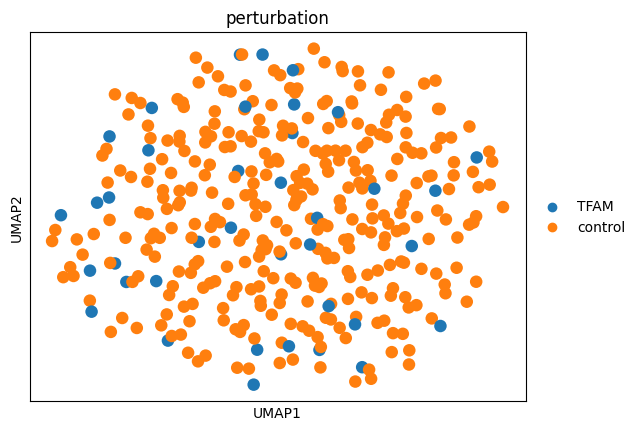

In [ ]:
sc.pl.umap(train, color = 'perturbation')
fig = plt.gcf()
display(fig)

In [ ]:
train.obs['cell_type'] = 'neurons'

In [ ]:
train

AnnData object with n_obs × n_vars = 370 × 2124
    obs: 'batch', 'perturbation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'mixscape_class_p_ko', 'mixscape_class', 'mixscape_class_global', 'pertclass', 'cell_type'
    var: 'ENSEMBL', 'ENTREZID', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'mixscape', 'neighbors', 'pca', 'umap', 'mixscape_class_colors', 'mixscape_class_global_colors', 'perturbation_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'X_pert', 'normal_counts'
    obsp: 'connectivities', 'distances'

In [ ]:
# sc.pp.normalize_total(train, target_sum=1e4)
# sc.pp.log1p(train)


# sc.pp.highly_variable_genes(train,
#                             n_top_genes=9_000,
#                             subset=True)

In [ ]:
print(train.X)

[[ 0.19217205  0.17291035 -0.14030439 ... -0.06158398 -0.30291846
   0.20897916]
 [ 0.09792969 -0.47117049 -0.05301343 ... -0.023586   -0.38256317
  -1.0195823 ]
 [ 0.10466969  0.37009645 -0.09297701 ...  0.44722462  0.14066745
   0.33280563]
 ...
 [ 0.17101292  1.0832927  -0.04299149 ...  0.          0.590916
   0.5270318 ]
 [-0.09873166 -0.58111703 -0.05437715 ...  0.         -0.29991284
   0.5095044 ]
 [ 0.0483951  -0.10622533  0.         ...  0.45618704 -0.18994759
  -0.48504427]]


In [ ]:
pt.tl.Scgen.setup_anndata(train, batch_key="perturbation", labels_key="cell_type")

In [ ]:
print(train.obs.columns)
# Should include: _scgen_batch, _scgen_labels


Index(['batch', 'perturbation', 'n_genes', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'leiden', 'mixscape_class_p_ko',
       'mixscape_class', 'mixscape_class_global', 'pertclass', 'cell_type',
       '_scvi_batch', '_scvi_labels'],
      dtype='object')


In [ ]:
pt.tl.Scgen.setup_anndata(train, batch_key="perturbation", labels_key="cell_type")

new_model = pt.tl.Scgen(train)

# this step is necessary if your target dataset has more cell types than your training dataset
# new_model._register_manager_for_instance(new_model.adata_manager.transfer_fields(adata_target=query_CTRL, extend_categories=True))

# We'll have to tune the hyperparameters in the end: Max epoch = 100, change batch size
new_model.train(
    max_epochs=100,
    batch_size=32,
    early_stopping=True,
    early_stopping_patience=25,
    accelerator="cpu",  # 'cuda' means you call GPU, otherwise default value is 'cpu'
)

INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Monitored metric elbo_validation did not improve in the last 25 records. Best score: 214.802. Signaling Trainer to stop.


In [ ]:
print(new_model.history.keys())

dict_keys(['train_loss_step', 'validation_loss', 'elbo_validation', 'reconstruction_loss_validation', 'kl_local_validation', 'kl_global_validation', 'train_loss_epoch', 'elbo_train', 'reconstruction_loss_train', 'kl_local_train', 'kl_global_train'])


In [ ]:
import matplotlib.pyplot as plt

def plot_scgen_diagnostics(model):
    history = model.history
    n_epochs = len(history["train_loss_epoch"])
    x = range(n_epochs)

    fig, axes = plt.subplots(3, 2, figsize=(12, 10))
    axes = axes.flatten()

    # 1. Total Loss
    axes[0].plot(x, history["train_loss_epoch"], label="Train")
    axes[0].plot(x, history["validation_loss"], label="Validation")
    axes[0].set_title("Loss")
    axes[0].legend()
    axes[0].grid(True)

    # 2. ELBO
    axes[1].plot(x, history["elbo_train"], label="Train")
    axes[1].plot(x, history["elbo_validation"], label="Validation")
    axes[1].set_title("ELBO")
    axes[1].legend()
    axes[1].grid(True)

    # 3. Reconstruction loss
    axes[2].plot(x, history["reconstruction_loss_train"], label="Train")
    axes[2].plot(x, history["reconstruction_loss_validation"], label="Validation")
    axes[2].set_title("Reconstruction Loss")
    axes[2].legend()
    axes[2].grid(True)

    # 4. KL local
    axes[3].plot(x, history["kl_local_train"], label="Train")
    axes[3].plot(x, history["kl_local_validation"], label="Validation")
    axes[3].set_title("KL Local")
    axes[3].legend()
    axes[3].grid(True)

    # 5. KL global
    axes[4].plot(x, history["kl_global_train"], label="Train")
    axes[4].plot(x, history["kl_global_validation"], label="Validation")
    axes[4].set_title("KL Global")
    axes[4].legend()
    axes[4].grid(True)

    # 6. Placeholder (or any extra)
    axes[5].axis('off')

    plt.tight_layout()
    plt.suptitle("scGen Training Diagnostics", y=1.02, fontsize=16)
    fig = plt.gcf()
    display(fig)


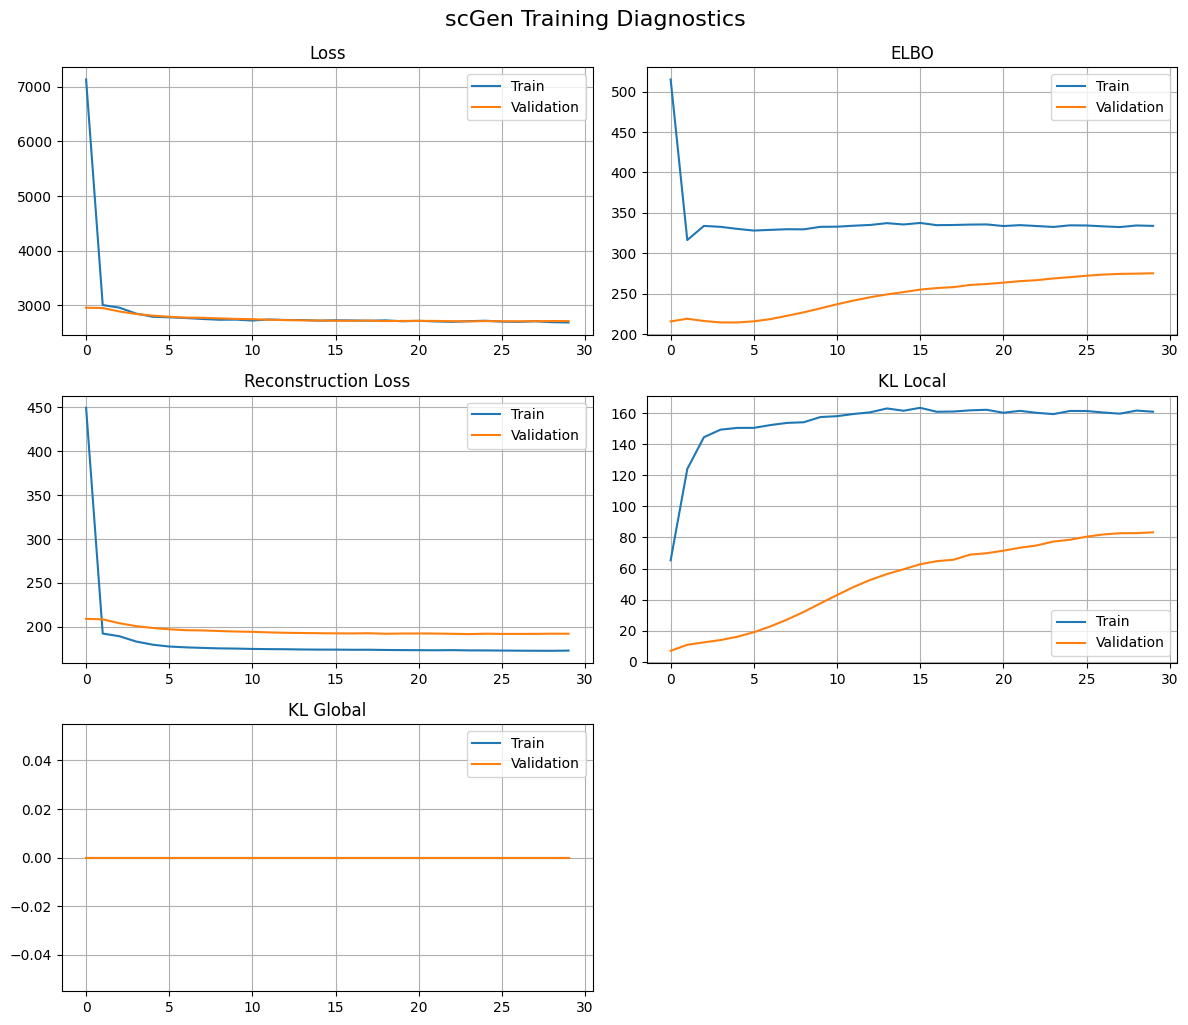

In [ ]:
plot_scgen_diagnostics(new_model)

In [ ]:
# Check all keys that are registered in the model
print(new_model.adata_manager.registry.keys())


dict_keys(['scvi_version', 'model_name', 'setup_args', 'field_registries', 'setup_method_name', '_scvi_uuid'])


In [ ]:
print(train.obs.columns)

Index(['batch', 'perturbation', 'n_genes', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'leiden', 'mixscape_class_p_ko',
       'mixscape_class', 'mixscape_class_global', 'pertclass', 'cell_type',
       '_scvi_batch', '_scvi_labels'],
      dtype='object')


In [ ]:
# Healthy midbrain organoids from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM7732411

import gdown

# Google Drive file ID
file_id = "1zMTxq3qfDFLL8jgAbwNnsxMcRZlKtha1"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="midbrain_organoids_GSM7732411.h5ad", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1zMTxq3qfDFLL8jgAbwNnsxMcRZlKtha1
From (redirected): https://drive.google.com/uc?id=1zMTxq3qfDFLL8jgAbwNnsxMcRZlKtha1&confirm=t&uuid=b91c1a9e-58ec-4bc4-9452-8374970b923e
To: /content/midbrain_organoids_GSM7732411.h5ad
100%|██████████| 1.42G/1.42G [00:14<00:00, 96.0MB/s]


'midbrain_organoids_GSM7732411.h5ad'

In [ ]:
# Testing dataset
organoid = sc.read("midbrain_organoids_GSM7732411.h5ad")
organoid

# Replace X with raw counts stored in the 'raw' layer
organoid.X = organoid.layers["raw"].copy()


# Normalize, log-transform, and keep top 2000 HVGs
sc.pp.normalize_total(organoid, target_sum=1e4)
sc.pp.log1p(organoid)
sc.pp.highly_variable_genes(organoid, n_top_genes=2124, flavor="seurat")
organoid = organoid[:, organoid.var["highly_variable"]].copy()

organoid.obs['cell_type'] = 'neurons'
organoid.obs['perturbation'] = 'control'

In [ ]:
pred, delta = new_model.predict(ctrl_key="control", stim_key="TFAM", adata_to_predict=organoid)
pred.obs["perturbation"] = "pred"

INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


In [ ]:
pred.X

array([[-0.16133673, -0.10634893, -0.03381614, ..., -0.01602753,
        -0.04865265, -0.05501238],
       [-0.15901814, -0.10205103, -0.03228977, ..., -0.0208125 ,
        -0.04824821, -0.05383769],
       [-0.16957787, -0.11693356, -0.03215602, ..., -0.01502102,
        -0.05205007, -0.06181114],
       ...,
       [-0.14983311, -0.10048227, -0.03236089, ..., -0.01452819,
        -0.04832595, -0.04777452],
       [-0.16652334, -0.10950538, -0.03544998, ..., -0.02711075,
        -0.05214589, -0.05619331],
       [-0.15027979, -0.10102265, -0.03346094, ..., -0.01386514,
        -0.0464845 , -0.04965132]], dtype=float32)

In [ ]:
eval_adata = organoid.concatenate(pred)

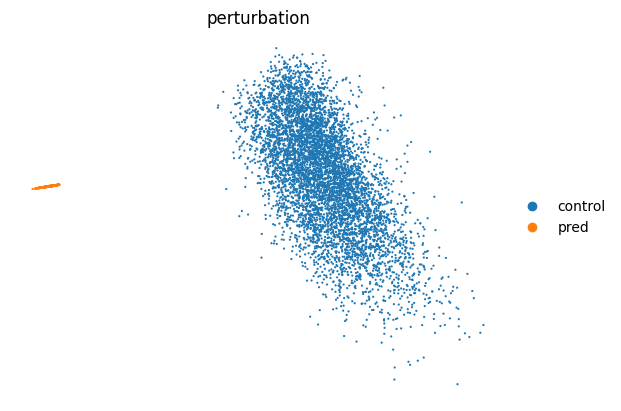

In [ ]:
sc.tl.pca(eval_adata)
sc.pl.pca(
    eval_adata,
    color="perturbation",
    frameon=False,
)
fig = plt.gcf()
display(fig)

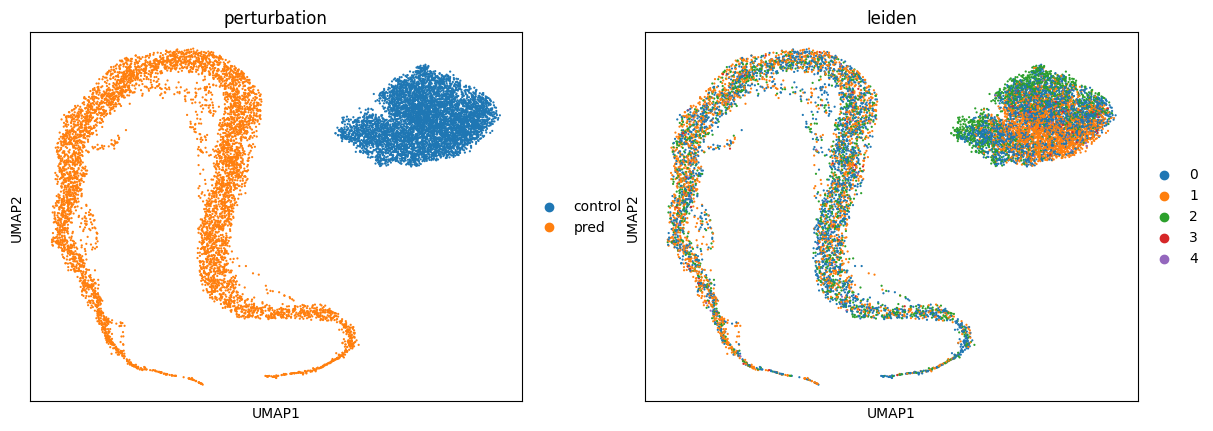

In [ ]:
sc.pp.neighbors(eval_adata, n_neighbors=15, n_pcs=30)
sc.tl.umap(eval_adata)

sc.pl.umap(
    eval_adata,
    color=["perturbation", "leiden"]
)
fig = plt.gcf()
display(fig)

In [ ]:
obs_key = 'perturbation'
contrast = "control"

etest = pt.tl.DistanceTest("edistance", n_perms=100, obsm_key="X_pca", alpha=0.05)
tab = etest(eval_adata, groupby=obs_key, contrast=contrast)

Output()

In [ ]:
tab

distance  pvalue  significant  pvalue_adj  significant_adj
control   0.000000    1.00        False      1.0000            False
pred     14.090633    0.01         True      0.0199             True

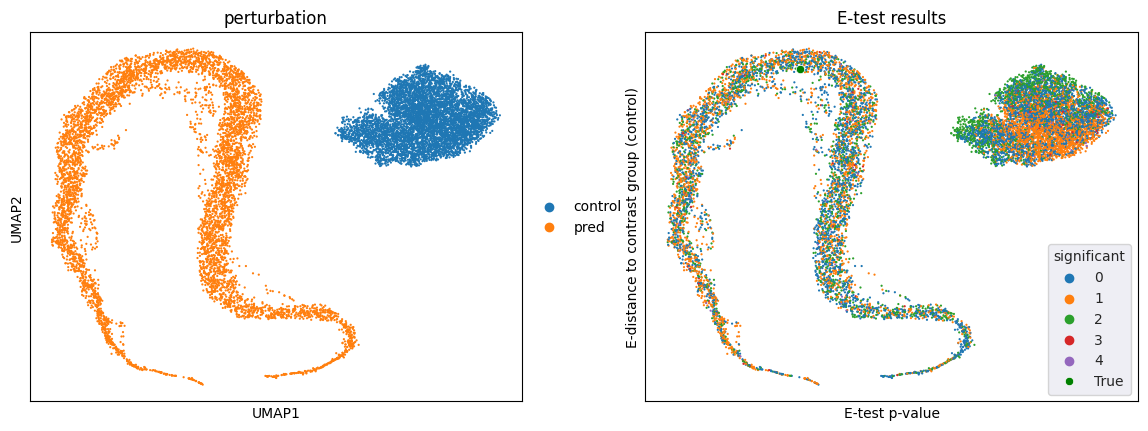

In [ ]:
import seaborn as sns

with sns.axes_style("darkgrid"):
    sns.scatterplot(
        data=tab[tab.index != contrast],
        x="pvalue",
        y="distance",
        hue="significant",
        palette={True: "green", False: "red"},
    )
plt.title("E-test results")
plt.xlabel("E-test p-value")
plt.ylabel("E-distance to contrast group (control)")
fig = plt.gcf()
display(fig)

In [ ]:
sc.tl.rank_genes_groups(eval_adata, groupby="perturbation", method="wilcoxon")
diff_genes = eval_adata.uns["rank_genes_groups"]["names"]
print(diff_genes)

[('LINC01128', 'FAM3C2') ('VPS26C', 'VTCN1') ('AP000317.2', 'AC092343.1')
 ... ('AC092343.1', 'AL034405.1') ('VTCN1', 'AL442647.1')
 ('FAM3C2', 'GAPDHP33')]


In [ ]:
import scanpy as sc

# This gives you a tidy dataframe with gene names, scores, logFC, pvals, pvals_adj etc.
df = sc.get.rank_genes_groups_df(eval_adata, group=None)  # group=None returns all groups
print(df.head())

     group       names     scores  logfoldchanges  pvals  pvals_adj
0  control   LINC01128  94.690285             NaN    0.0        0.0
1  control      VPS26C  94.690285             NaN    0.0        0.0
2  control  AP000317.2  94.690285             NaN    0.0        0.0
3  control  AP000275.2  94.690285             NaN    0.0        0.0
4  control        URB1  94.690285             NaN    0.0        0.0


In [ ]:
# Get the top 30 rows sorted by logFC (or adjust sorting if already sorted)
top_genes = df.sort_values("logfoldchanges", ascending=False).head(100)["names"].tolist()

print(top_genes)

['EDIL3', 'PDS5A', 'TENM4', 'PTPRD', 'POLG', 'PCDH11X', 'SLC25A16', 'SGCZ', 'CAPN2', 'PCDH15', 'ARPP21', 'NMT1', 'AC025287.1', 'RABEP1', 'HCRTR2', 'CD81', 'TRIP12', 'KAT8', 'FSTL5', 'ATP6V1G1', 'COX6B1', 'ABCA10', 'ADAMTS3', 'RALGPS2', 'LINC01322', 'CDKN1A', 'NECTIN3', 'AL162497.1', 'DENND5B', 'KIF22', 'ZDBF2', 'TECPR2', 'CAP1', 'PINK1', 'RGS6', 'CDH8', 'GTF3A', 'FIGN', 'RBM15', 'ASIC2', 'LY6E', 'PKN2-AS1', 'SLC4A1AP', 'CCNY', 'GABRA2', 'MXI1', 'KIF15', 'SERINC1', 'EGFLAM', 'AC138123.1', 'AVEN', 'VPS18', 'CPEB3', 'FAM19A1', 'SYCP2L', 'PXDN', 'SLC52A1', 'DAPK3', 'PRKAB2', 'MRPL4', 'NOVA1-AS1', 'WDHD1', 'TMEM266', 'FAM228B', 'SOX6', 'CRISPLD1', 'EPHA7', 'AC004980.1', 'PPCDC', 'ZSWIM4', 'TECRL', 'ZNF462', 'RPS12', 'STK32B', 'SEMA3A', 'CIAPIN1', 'RNF180', 'SOD2-1', 'NKD1', 'IMMT', 'DYNLT1', 'PSMD8', 'HECTD2', 'AC136475.1', 'ZNF571', 'ZFHX4-AS1', 'RPL9', 'DDRGK1', 'ZNF76', 'MID2', 'PIBF1', 'CNTRL', 'TBC1D22A', 'DGKG', 'LINC00205', 'AGPAT5', 'PDZRN3', 'ZNF622', 'CNTNAP4', 'RNF217']


In [ ]:
sc.pl.dotplot(eval_adata, top_genes[1:10], groupby="perturbation")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import numpy as np
import re

def polished_dotplot(df: pd.DataFrame,
                     pval_col='Adjusted P-value',
                     color_col='Combined Score',
                     size_factor=30,
                     title='',
                     top_term=20,
                     cmap='Reds',
                     font_family='DejaVu Sans',
                     font_size=10):

    df = df.copy()

    # Clean pathway codes
    df['Term'] = df['Term'].str.replace(r'\s+\(?(WP|R-HSA)[-_]?\d+\)?$', '', regex=True)

    # Parse overlap
    df[['overlap_hits', 'overlap_total']] = df['Overlap'].str.split('/', expand=True).astype(int)
    df['gene_ratio'] = df['overlap_hits'] / df['overlap_total']
    df['log10_pval'] = -np.log10(df[pval_col])

    # Top N terms
    df_top = df.sort_values('log10_pval', ascending=False).head(top_term)

    # Set global font
    plt.rcParams.update({
        'font.family': font_family,
        'axes.labelsize': font_size + 1,
        'xtick.labelsize': font_size,
        'ytick.labelsize': font_size,
        'axes.titlesize': font_size + 2,
    })

    # Normalize color
    norm = colors.Normalize(vmin=df_top[color_col].min(), vmax=df_top[color_col].max())
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    bar_colors = sm.to_rgba(df_top[color_col])

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(
        df_top['log10_pval'],
        df_top['Term'],
        s=df_top['overlap_hits'] * size_factor,
        c=bar_colors,
        cmap=cmap,
        edgecolors='k',
        linewidth=0.5,
        alpha=0.9
    )

    ax.set_xlabel('−log₁₀(Adjusted P-value)')
    ax.set_title(title)
    ax.invert_yaxis()

    # Add colorbar (shrunk)
    cbar = plt.colorbar(sm, ax=ax, fraction=0.035, pad=0.04)
    cbar.set_label(color_col, size=font_size)
    cbar.ax.tick_params(labelsize=font_size - 1)

    plt.tight_layout()
    fig = plt.gcf()
    display(fig)
    return ax


In [ ]:
%pip install gseapy --quiet
import gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.5/597.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
groups = {
    "Perturbation Signatures": [
        "Disease_Perturbations_from_GEO_down",
        "Disease_Perturbations_from_GEO_up",
    ],

    "Allen Brain" : ["Allen_Brain_Atlas_10x_scRNA_2021",
    "Allen_Brain_Atlas_down",
    "Allen_Brain_Atlas_up"],

    "Phenotype & Disease": [
        "OMIM_Disease",
        "Jensen_DISEASES",
        "Jensen_DISEASES_Curated_2025",
        "Jensen_DISEASES_Experimental_2025",
        "Human_Phenotype_Ontology",
    ],
    "Genetic Association Studies": [
        "GWAS_Catalog_2023",
        "DisGeNET",
    ],
    "Curated Pathways": [
        "Reactome_Pathways_2024",
        "WikiPathways_2024_Human",
    ],
    "Gene Ontology": [
        "GO_Biological_Process_2025",
    ],

    'rummagene/geo': ['RummaGEO_DrugPerturbations_2025',
'RummaGEO_GenePerturbations_2025',
'Rummagene_kinases',
'Rummagene_signatures',
'Rummagene_transcription_factors']


}


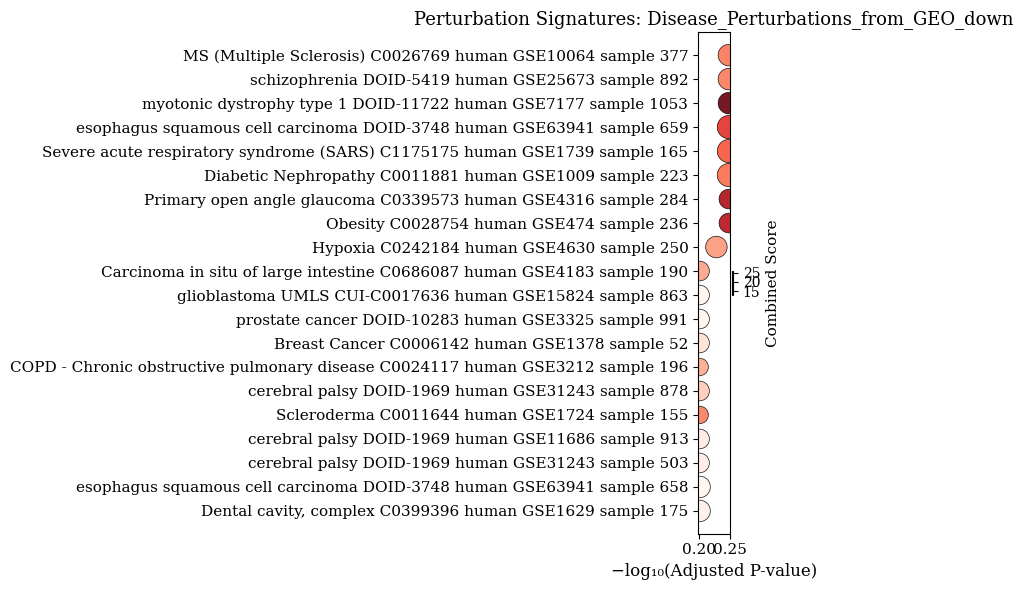

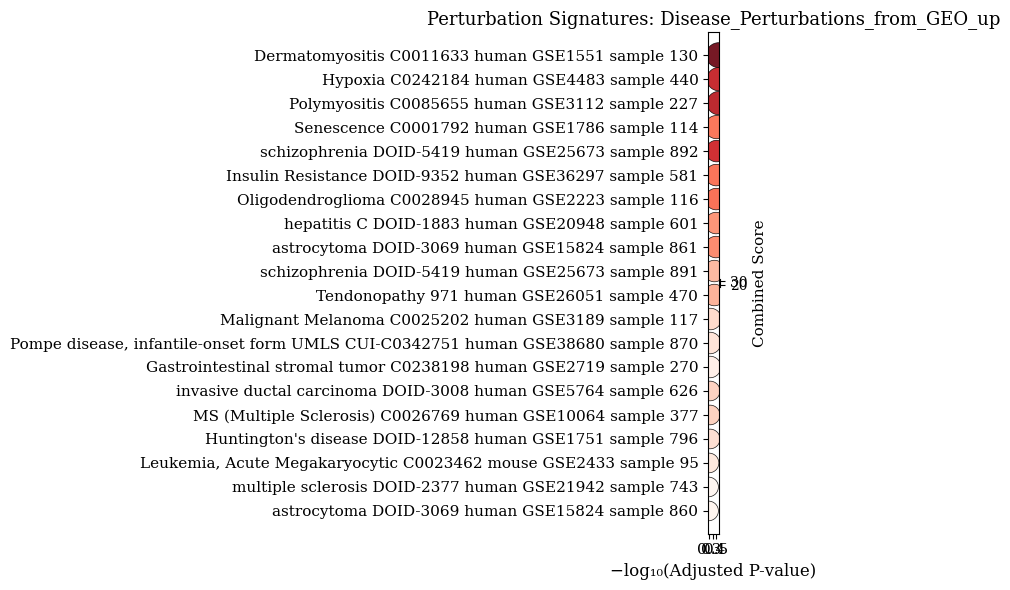

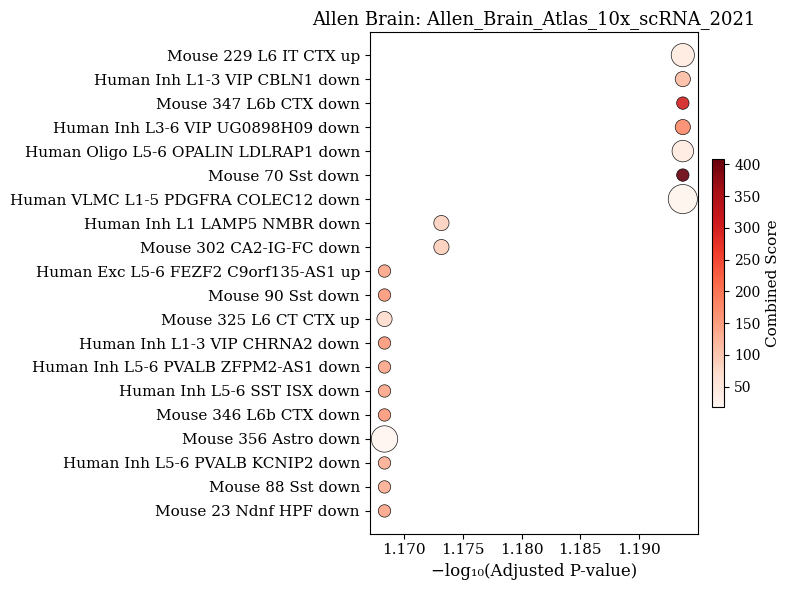

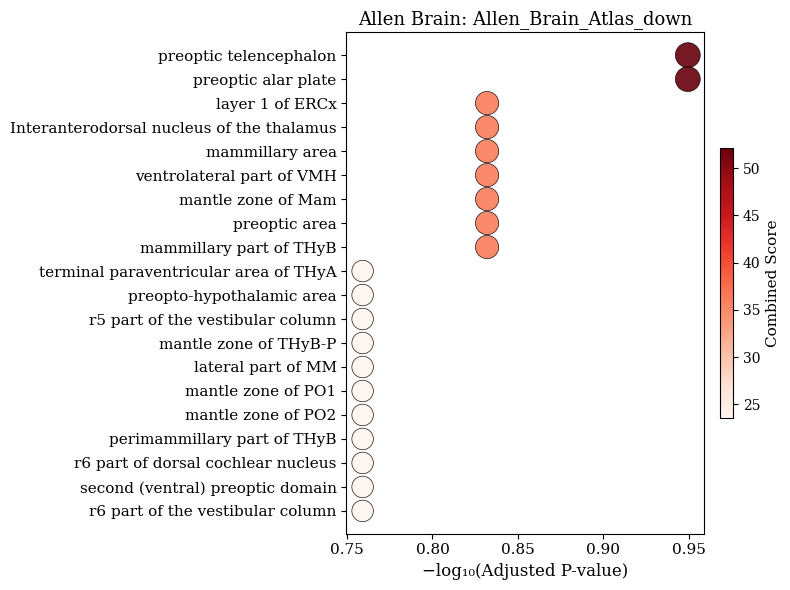

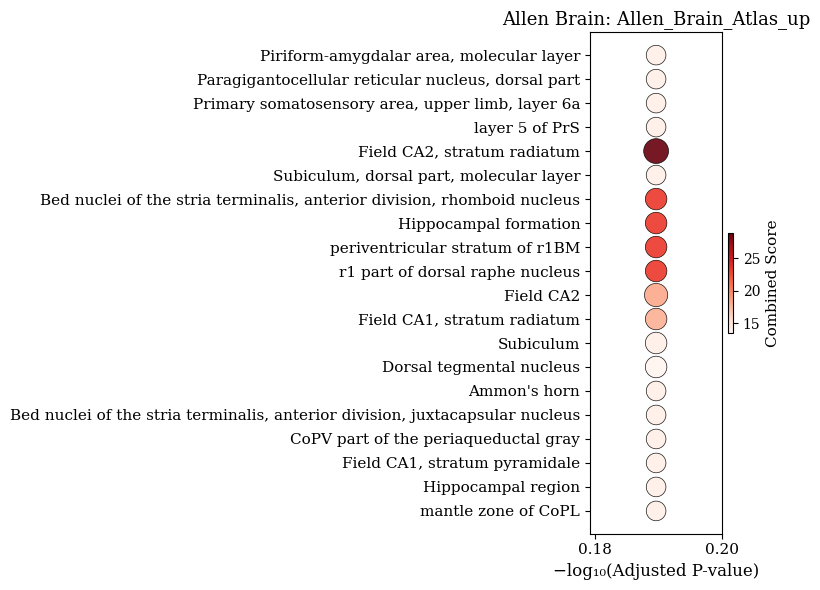

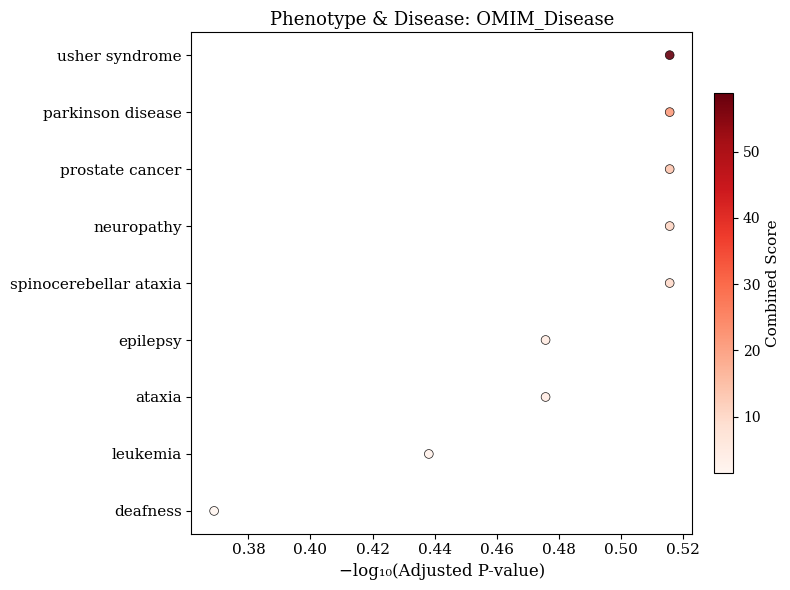

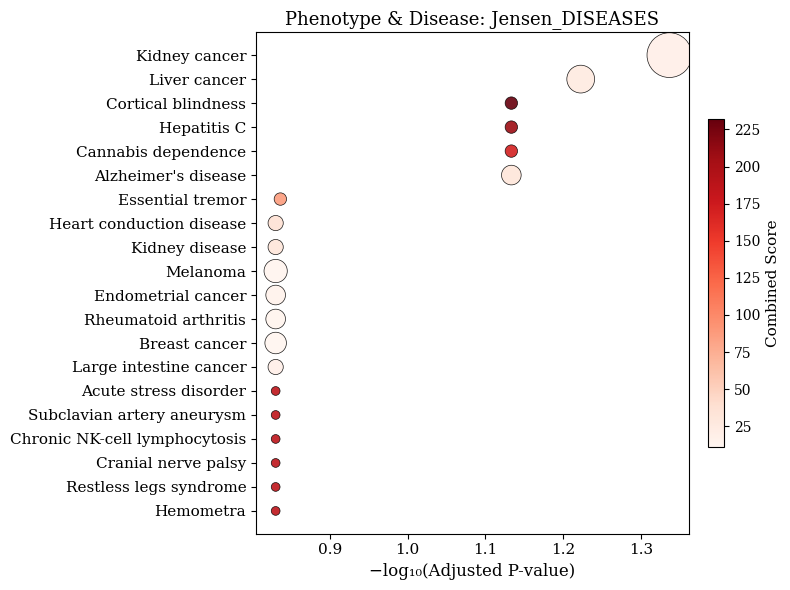

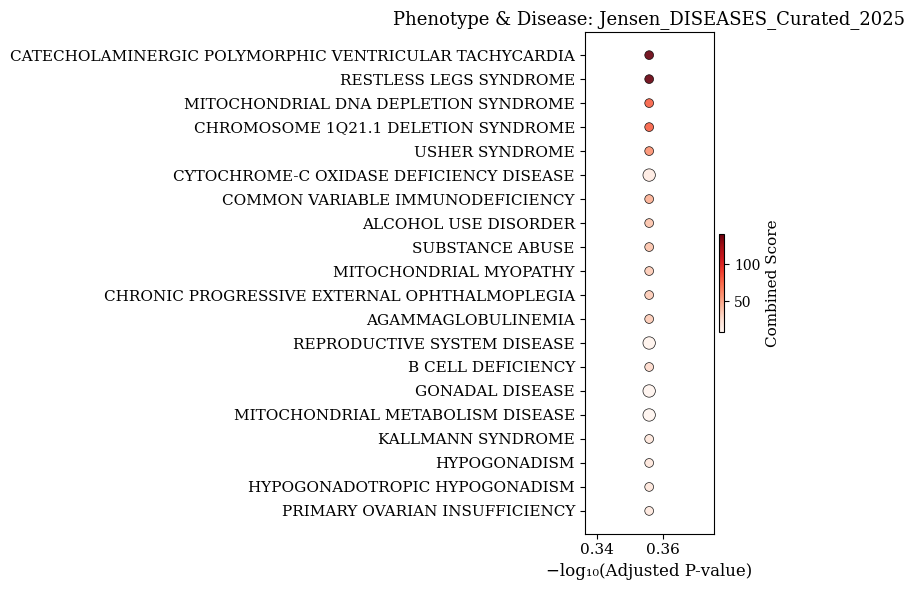

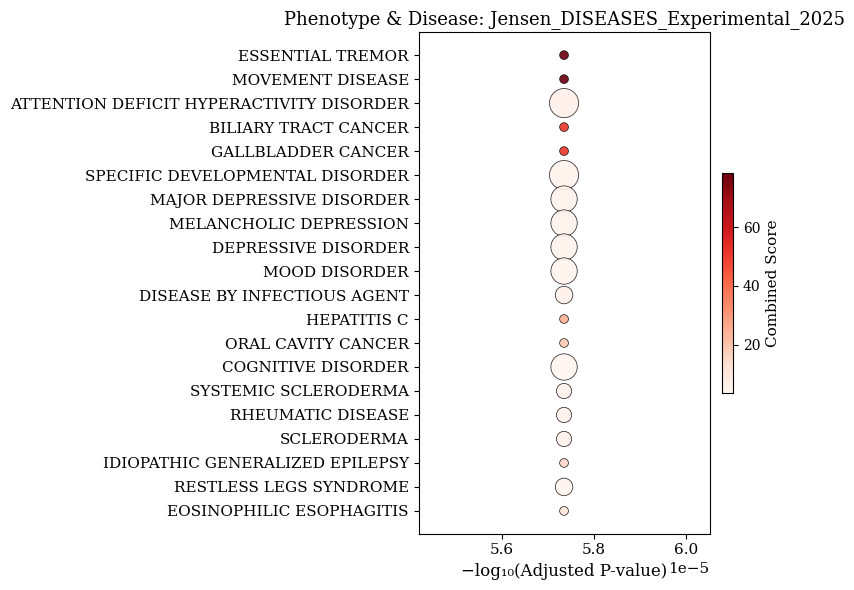

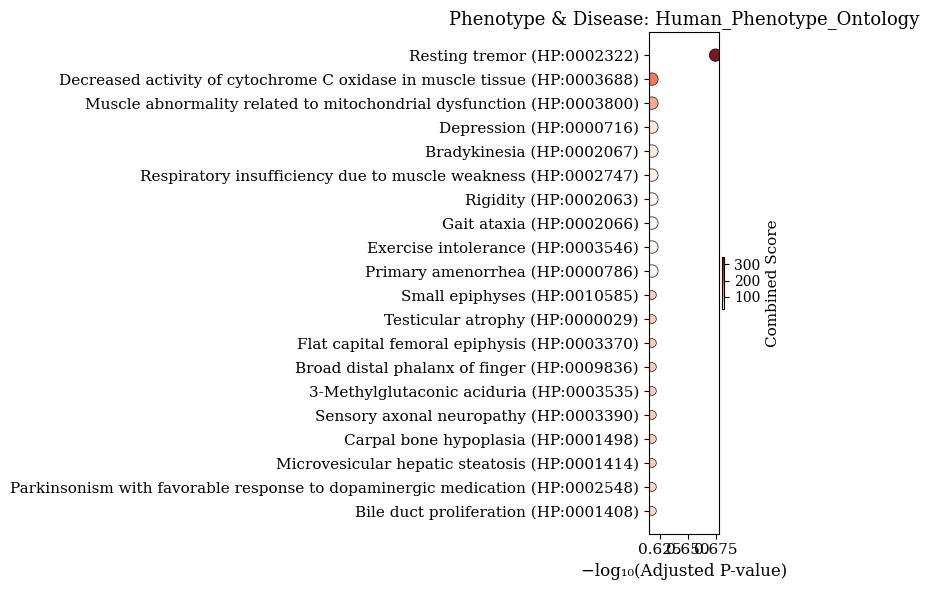

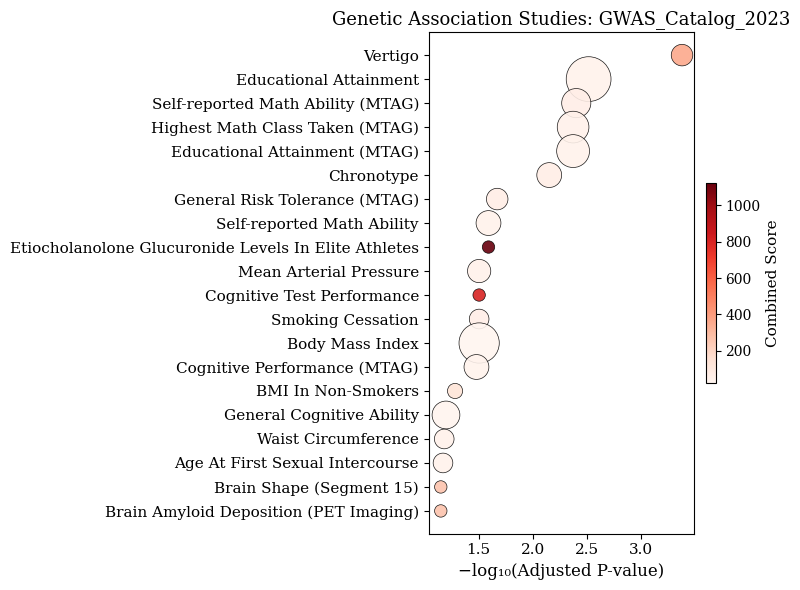

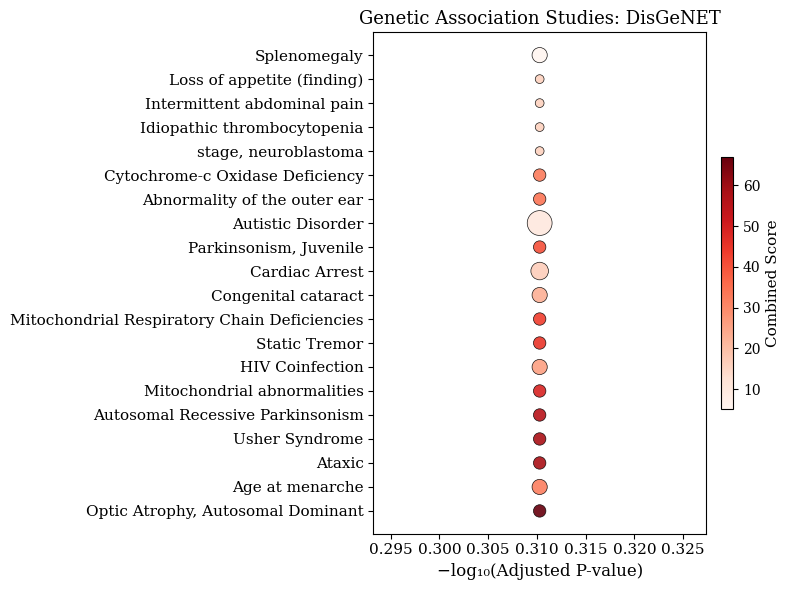

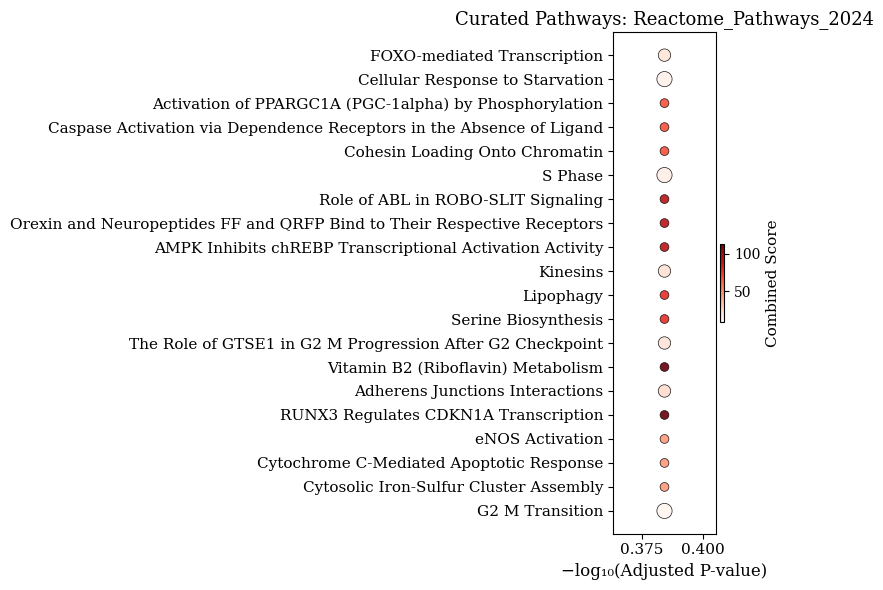

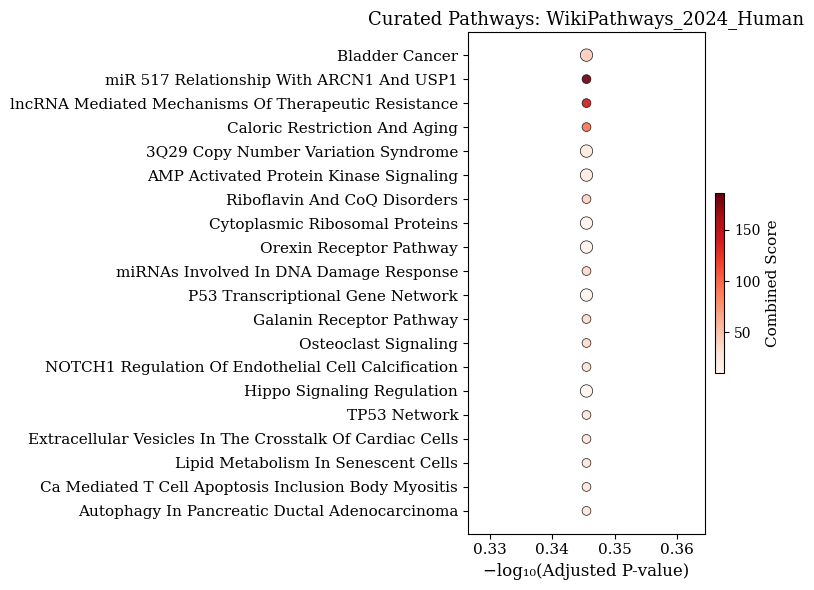

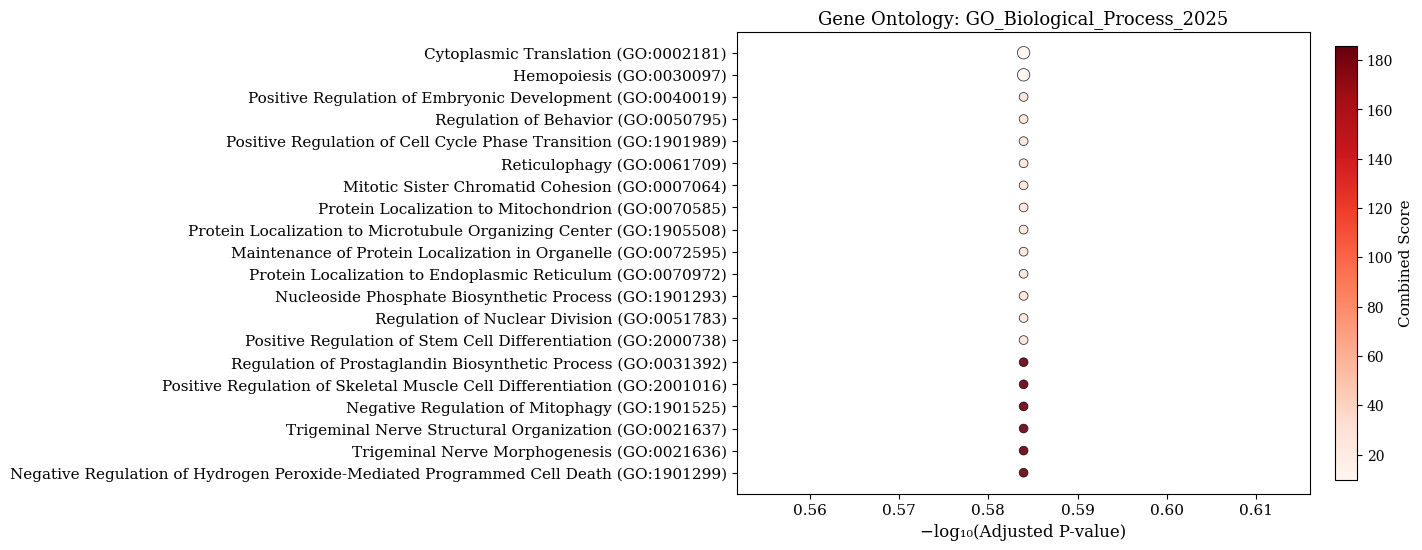

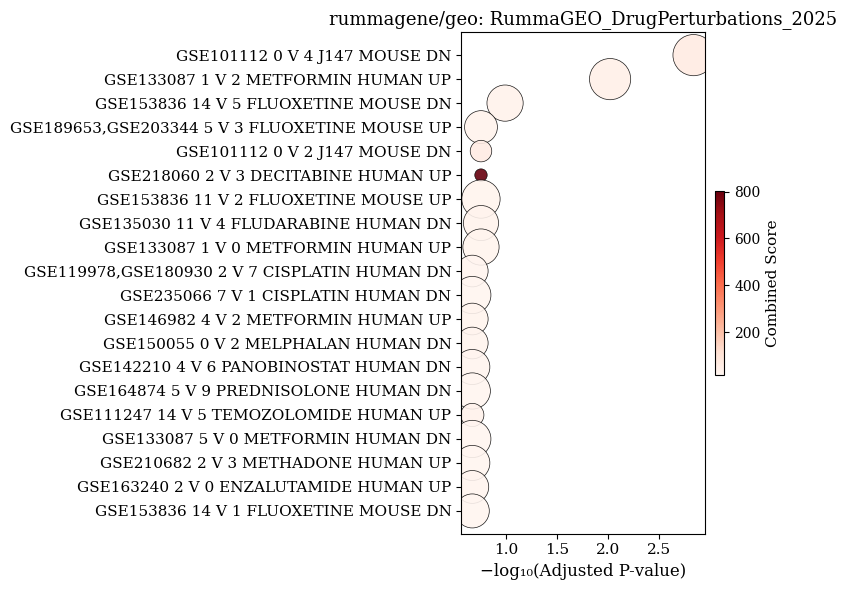

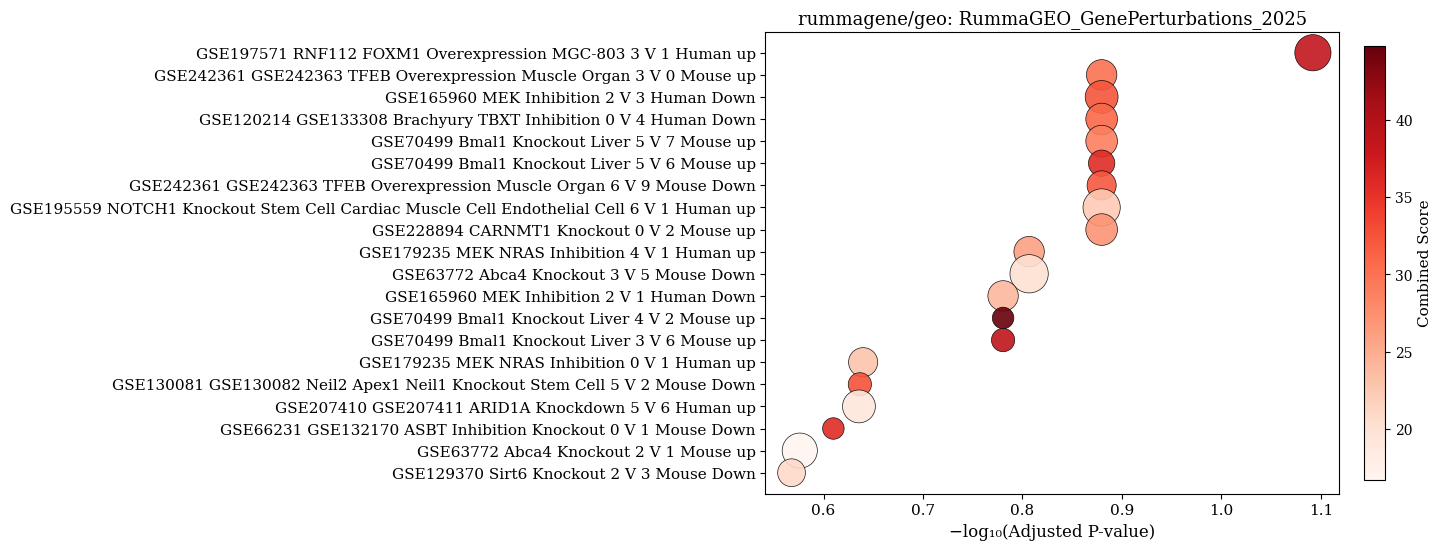

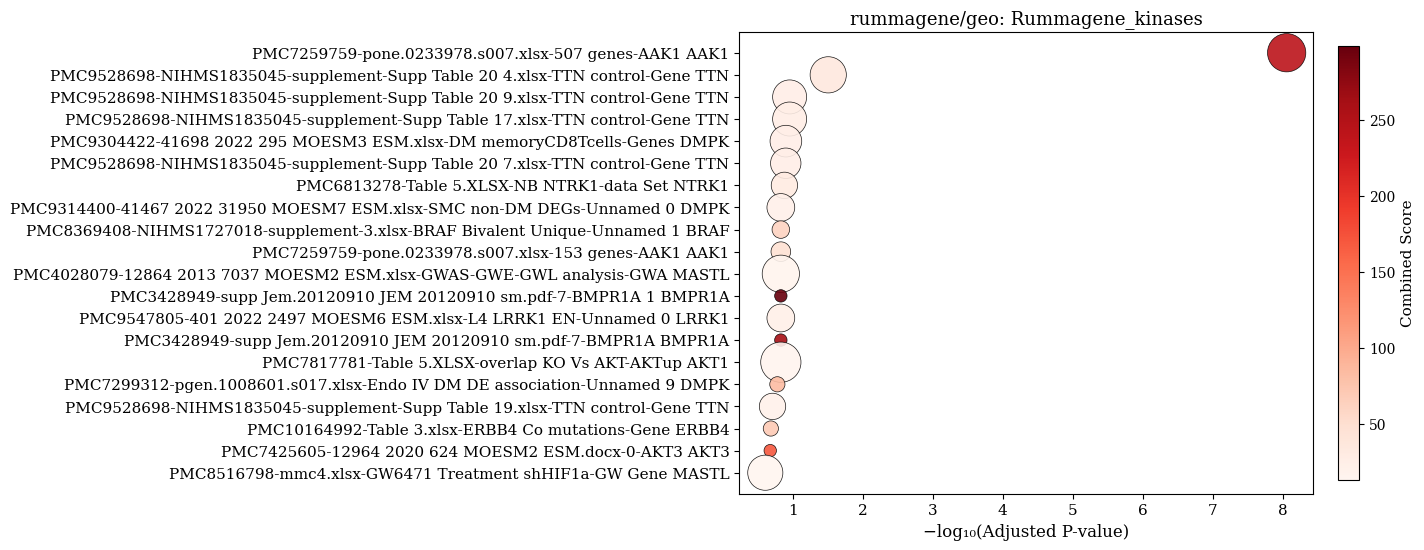

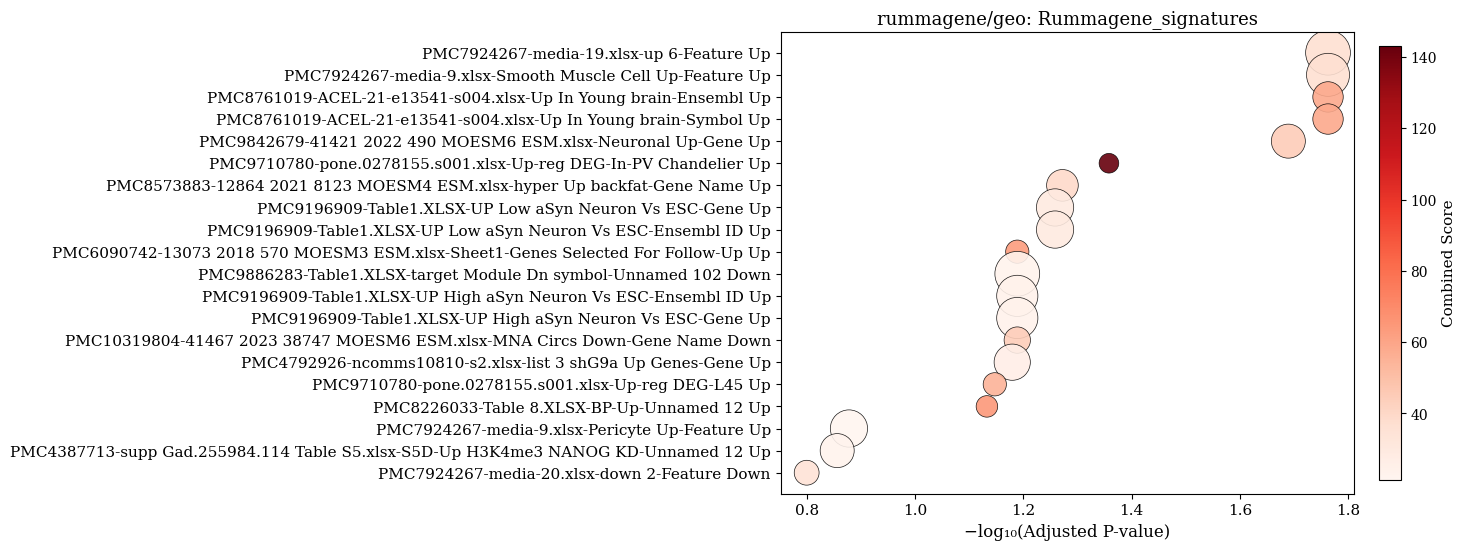

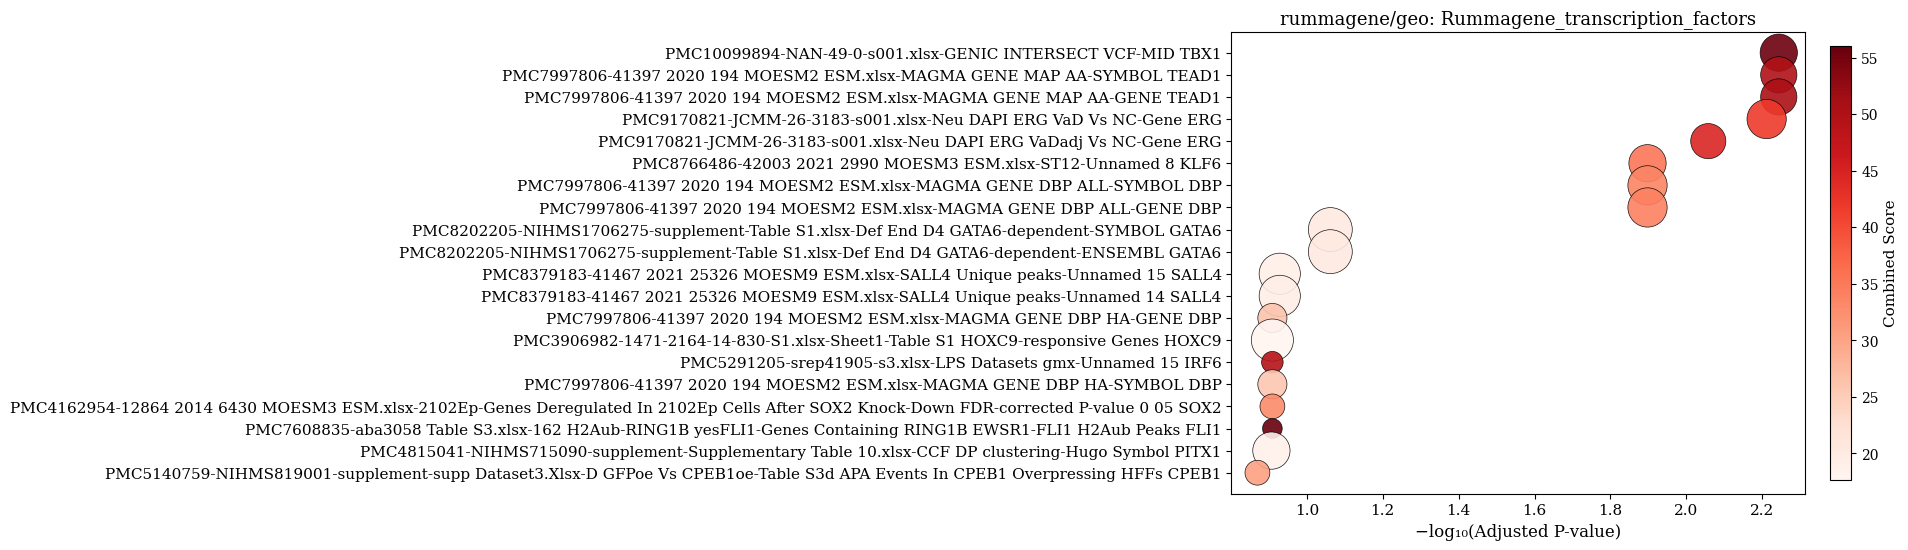

In [ ]:
for group, libs in groups.items():
    for lib in libs:
        try:
            enr = gseapy.enrichr(
                gene_list=top_genes,
                organism="Human",
                gene_sets=lib,
                cutoff=0.05
            )
            if enr.results.empty:
                continue
            polished_dotplot(
                enr.results,
                title=f"{group}: {lib}",
                top_term=20,
                size_factor=40,
                font_family='DejaVu Serif',
                font_size=11
            )
            plt.show()
        except Exception as e:
            print(f"❌ {group} → {lib}: {e}")


In [ ]:
import gseapy
enr_res = gseapy.enrichr(gene_list=top_genes, organism='Human', gene_sets='Disease_Perturbations_from_GEO_up', cutoff = 0.05)
enr_res.results.head()

Gene_set  \
0  Disease_Perturbations_from_GEO_up   
1  Disease_Perturbations_from_GEO_up   
2  Disease_Perturbations_from_GEO_up   
3  Disease_Perturbations_from_GEO_up   
4  Disease_Perturbations_from_GEO_up   

                                                Term Overlap   P-value  \
0  Dermatomyositis C0011633 human GSE1551 sample 130   8/368  0.000520   
1     Polymyositis C0085655 human GSE3112 sample 227   7/321  0.001150   
2          Hypoxia C0242184 human GSE4483 sample 440   7/325  0.001235   
3  schizophrenia DOID-5419 human GSE25673 sample 892   6/263  0.002076   
4       Senescence C0001792 human GSE1786 sample 114   7/364  0.002349   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.274154            0                     0    4.719807   
1          0.274154            0                     0    4.694952   
2          0.274154            0                     0    4.634950   
3          0.312871            0                     0    4.878632   
4          0.312871            0                     0    4.120388   

   Combined Score                                             Genes  
0       35.688624  PSMD8;PINK1;CDKN1A;DYNLT1;CD81;GTF3A;TRIP12;LY6E  
1       31.775871         PSMD8;CAP1;CDKN1A;DYNLT1;CD81;CAPN2;GTF3A  
2       31.039073      AGPAT5;CDKN1A;DYNLT1;MXI1;SERINC1;RPL9;RPS12  
3       30.136116              FSTL5;EPHA7;ADAMTS3;HECTD2;FIGN;RGS6  
4       24.944066      CDKN1A;DYNLT1;CD81;SERINC1;RPL9;PDZRN3;RPS12

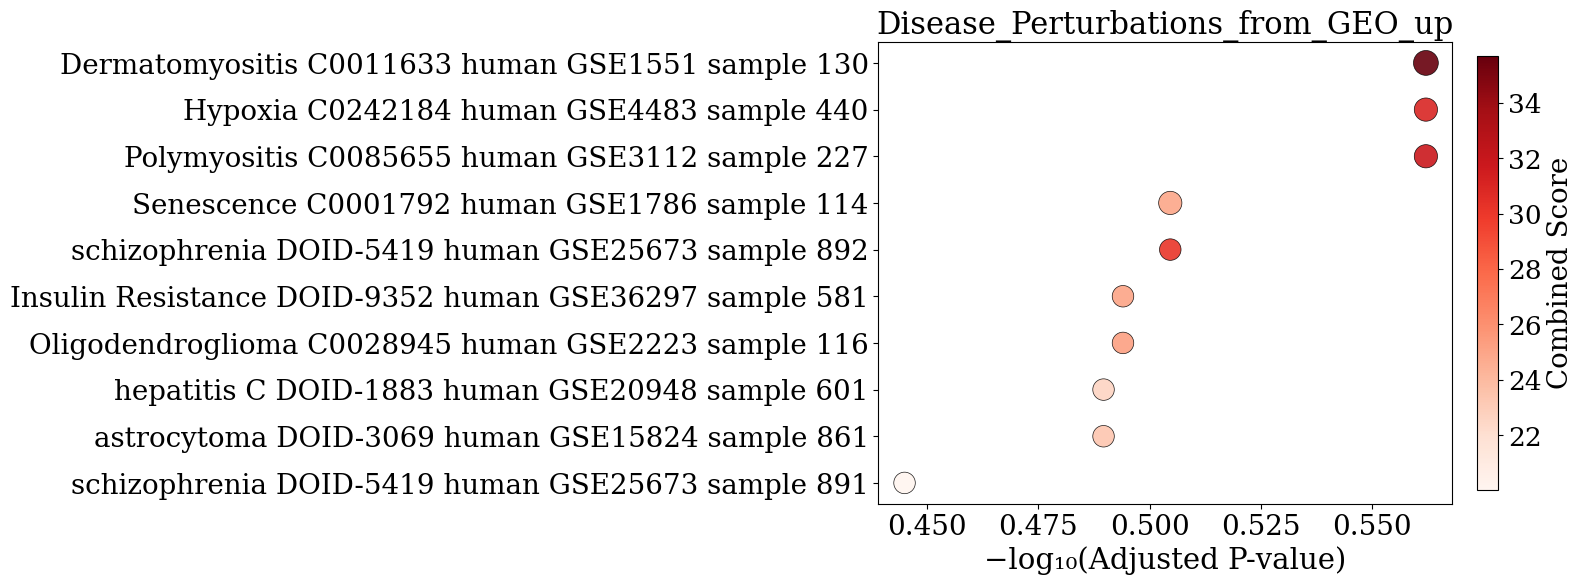

<Axes: title={'center': 'Disease_Perturbations_from_GEO_up'}, xlabel='−log₁₀(Adjusted P-value)'>

In [ ]:
polished_dotplot(
    enr_res.results,
    title='Disease_Perturbations_from_GEO_up',
    top_term=10,
    size_factor=40,          # adjust as needed
    font_family='DejaVu Serif',
    font_size=20
)

In [ ]:
# ─────────────────────────────────────────────
# EXTRA: Isolate Parkinson's-related enrichments
# ─────────────────────────────────────────────

parkinson_terms = []
keywords = ['alpha-synuclein', 'SNCA', 'Lewy body',
    'mitochondrial dysfunction', 'PINK1', 'parkin', 'PRKN',
    'oxidative stress', 'ROS', 'ubiquitin-proteasome', 'autophagy',
    'neuroinflammation', 'microglial activation', 'ferroptosis',
    'LRRK2', 'Rab GTPase', 'MAPK signaling', 'PI3K-Akt', 'mTOR',
    'apoptosis', 'caspase', 'calcium signaling',
    'gut-brain axis', 'dopaminergic synapse', 'BDNF', 'GDNF',
    'NMDA receptor', 'GABA receptor'
]


for group, libs in groups.items():
    for lib in libs:
        try:
            enr = gseapy.enrichr(
                gene_list=top_genes,
                organism="Human",
                gene_sets=lib,
                cutoff=0.05
            )
            if enr.results.empty:
                continue

            # Filter for Parkinson's-related terms
            df = enr.results.copy()
            df['Library'] = lib
            df['Group'] = group

            df_filtered = df[df['Term'].str.lower().str.contains('|'.join(keywords))]
            if not df_filtered.empty:
                parkinson_terms.append(df_filtered)
        except Exception as e:
            print(f"❌ {group} → {lib}: {e}")

# Concatenate all Parkinson-related results
if parkinson_terms:
    parkinson_df = pd.concat(parkinson_terms, ignore_index=True)
    display(parkinson_df[['Term', 'P-value', 'Adjusted P-value', 'Combined Score', 'Overlap', 'Library', 'Group']])
else:
    print("🧠 No Parkinson's-related terms found in current results.")


Term   P-value  \
0    Parkinson's disease DOID-14330 human GSE19587 ...  0.034926   
1    Parkinson's disease DOID-14330 human GSE6613 s...  0.080915   
2    Parkinson's disease DOID-14330 human GSE19587 ...  0.085427   
3    Parkinson's disease DOID-14330 human GSE7621 s...  0.110492   
4    Parkinson's disease DOID-14330 human GSE7621 s...  0.139111   
..                                                 ...       ...   
97   PMC10248509-Data Sheet 6.CSV--Autophagy AND GS...  0.385772   
98   PMC10248509-Data Sheet 5.CSV--Autophagy AND GS...  0.421809   
99   PMC10248509-Data Sheet 5.CSV--GSE58294 DE-gene...  0.512870   
100  PMC10248509-Data Sheet 5.CSV--GSE66724 DE-Gene...  0.641955   
101  PMC10248509-Data Sheet 6.CSV--GSE58294 DE-gene...  0.816349   

     Adjusted P-value  Combined Score Overlap  \
0            0.706649        9.692571   5/361   
1            0.745392        6.369820   4/326   
2            0.745392        7.345975   3/207   
3            0.745392        4.967769   4/365   
4            0.786534        4.699755   3/258   
..                ...             ...     ...   
97           0.702180        1.984794    1/97   
98           0.714531        1.597879   1/109   
99           0.777643        0.740395   3/543   
100          0.820140        0.407641   2/434   
101          0.895106        0.146630  5/1356   

                                 Library                    Group  
0    Disease_Perturbations_from_GEO_down  Perturbation Signatures  
1    Disease_Perturbations_from_GEO_down  Perturbation Signatures  
2    Disease_Perturbations_from_GEO_down  Perturbation Signatures  
3    Disease_Perturbations_from_GEO_down  Perturbation Signatures  
4    Disease_Perturbations_from_GEO_down  Perturbation Signatures  
..                                   ...                      ...  
97       Rummagene_transcription_factors            rummagene/geo  
98       Rummagene_transcription_factors            rummagene/geo  
99       Rummagene_transcription_factors            rummagene/geo  
100      Rummagene_transcription_factors            rummagene/geo  
101      Rummagene_transcription_factors            rummagene/geo  

[102 rows x 7 columns]

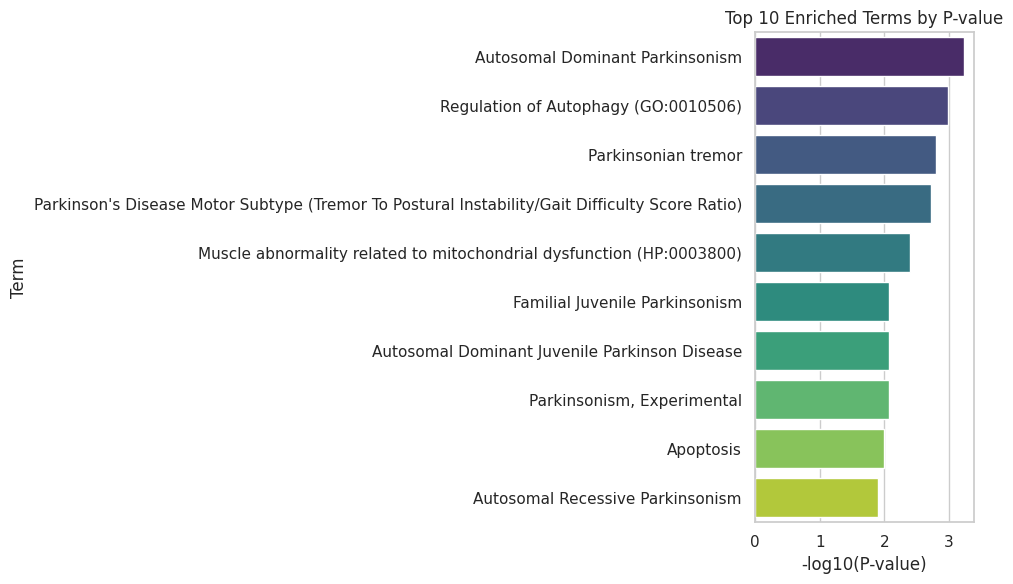

In [ ]:

# Sort by P-value and select top 10
top_terms = parkinson_df.sort_values('P-value').head(10).copy()
top_terms["-log10(P-value)"] = -np.log10(top_terms["P-value"])

# Ensure terms are ordered by significance
top_terms = top_terms.sort_values("P-value", ascending=True)
order = top_terms["Term"]

# Set plot style
sns.set(style="whitegrid")

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='-log10(P-value)',
    y='Term',
    data=top_terms,
    palette='viridis',
    order=order
)

plt.title('Top 10 Enriched Terms by P-value')
plt.xlabel('-log10(P-value)')
plt.ylabel('Term')
plt.tight_layout()
fig = plt.gcf()
display(fig)

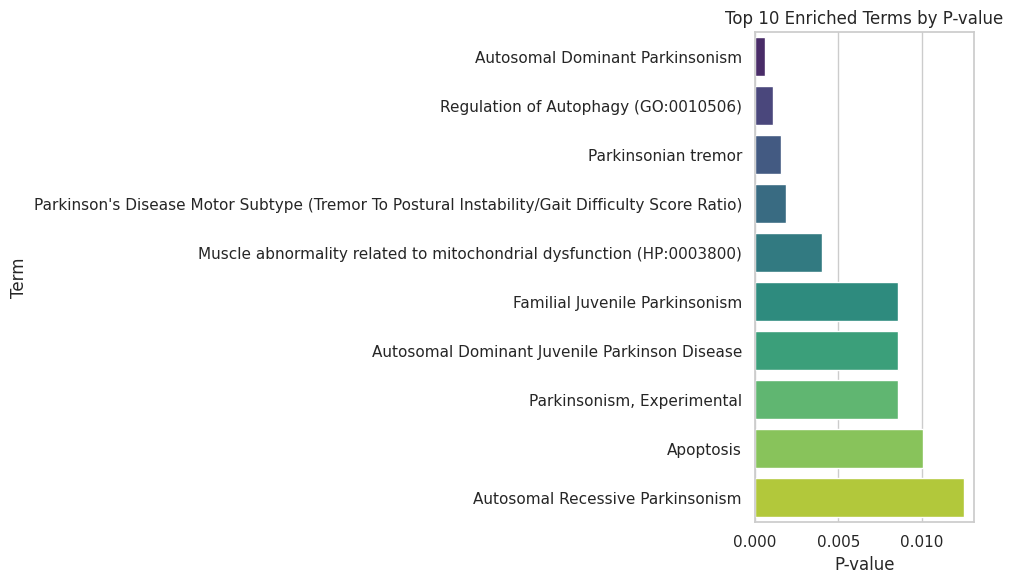

In [ ]:
# Sort by P-value and select top 10
top_terms = parkinson_df.sort_values('P-value').head(10)

# Set plot style
sns.set(style="whitegrid")

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='P-value', y='Term', data=top_terms, palette='viridis')
plt.title('Top 10 Enriched Terms by P-value')
plt.xlabel('P-value')
plt.ylabel('Term')
plt.tight_layout()
fig = plt.gcf()
display(fig)

Gene_set  \
20                    DisGeNET   
53  GO_Biological_Process_2025   
21                    DisGeNET   
18           GWAS_Catalog_2023   
16    Human_Phenotype_Ontology   
23                    DisGeNET   
22                    DisGeNET   
24                    DisGeNET   
34      Reactome_Pathways_2024   
25                    DisGeNET   

                                                 Term Overlap   P-value  \
20                    Autosomal Dominant Parkinsonism    3/33  0.000593   
53               Regulation of Autophagy (GO:0010506)   6/230  0.001051   
21                                Parkinsonian tremor    2/12  0.001581   
18  Parkinson's Disease Motor Subtype (Tremor To P...    2/13  0.001862   
16  Muscle abnormality related to mitochondrial dy...    2/19  0.004004   
23                     Familial Juvenile Parkinsonism    2/28  0.008596   
22      Autosomal Dominant Juvenile Parkinson Disease    2/28  0.008596   
24                         Parkinsonism, Experimental    2/28  0.008596   
34                                          Apoptosis   4/168  0.010089   
25                   Autosomal Recessive Parkinsonism    2/34  0.012512   

    Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
20          0.489458            0                     0   20.484536   
53          0.260641            0                     0    5.606763   
21          0.489458            0                     0   40.591837   
18          0.076117            0                     0   36.899814   
16          0.240994            0                     0   23.869148   
23          0.489458            0                     0   15.599686   
22          0.489458            0                     0   15.599686   
24          0.489458            0                     0   15.599686   
34          0.412783            0                     0    5.014228   
25          0.489458            0                     0   12.670918   

    Combined Score                                Genes  \
20      152.192426                      PINK1;POLG;LY6E   
53       38.452861  PINK1;ATP6V1G1;CCNY;DAPK3;KAT8;MID2   
21      261.803919                           PINK1;POLG   
18      231.947593                        PCDH15;STK32B   
16      131.768437                          COX6B1;POLG   
23       74.198880                           PINK1;POLG   
22       74.198880                           PINK1;POLG   
24       74.198880                           PINK1;POLG   
34       23.047169                PSMD8;AVEN;DAPK3;NMT1   
25       55.511657                           PINK1;POLG   

                       Library                        Group  
20                    DisGeNET  Genetic Association Studies  
53  GO_Biological_Process_2025                Gene Ontology  
21                    DisGeNET  Genetic Association Studies  
18           GWAS_Catalog_2023  Genetic Association Studies  
16    Human_Phenotype_Ontology          Phenotype & Disease  
23                    DisGeNET  Genetic Association Studies  
22                    DisGeNET  Genetic Association Studies  
24                    DisGeNET  Genetic Association Studies  
34      Reactome_Pathways_2024             Curated Pathways  
25                    DisGeNET  Genetic Association Studies

                  Gene_set                                                                                           Term Overlap  P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  Combined Score                               Genes                    Library                       Group
                  DisGeNET                                                                Autosomal Dominant Parkinsonism    3/33 0.000593          0.489458            0                     0   20.484536      152.192426                     PINK1;POLG;LY6E                   DisGeNET Genetic Association Studies
GO_Biological_Process_2025                                                           Regulation of Autophagy (GO:0010506)   6/230 0.001051          0.260641            0                     0    5.606763       38.452861 PINK1;ATP6V1G1;CCNY;DAPK3;KAT8;MID2 GO_Biological_Process_2025               Gene Ontology
                  DisGeNET                                         

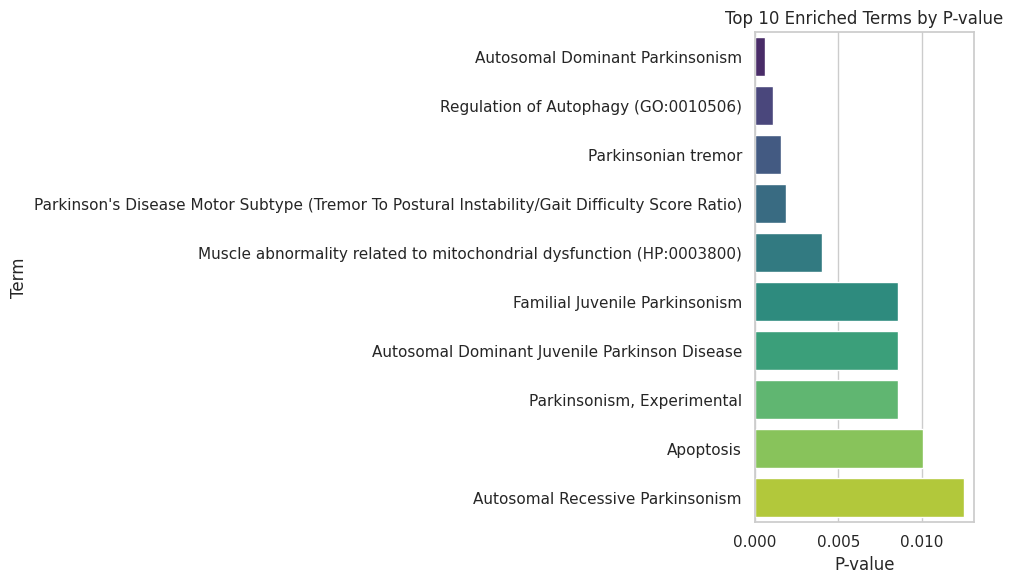

In [ ]:
# Sort by P-value and select top 10
top_terms = parkinson_df.sort_values('P-value').head(10)

# Display as a table
from IPython.display import display
display(top_terms)  # shows a nice HTML table in Jupyter/Colab

# Or, if you want a plain text table in console:
print(top_terms.to_string(index=False))

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='P-value', y='Term', data=top_terms, palette='viridis')
plt.title('Top 10 Enriched Terms by P-value')
plt.xlabel('P-value')
plt.ylabel('Term')
plt.tight_layout()
fig = plt.gcf()
display(fig)